In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ryanf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df_pt = pd.read_csv('../../dataset/atas_pt_dataset.csv')
df_en = pd.read_csv('../../dataset/atas_en_dataset.csv')


In [27]:
df_pt.shape
df_pt['data'] = pd.to_datetime(df_pt['data'], format='%Y%m%d')

In [28]:
df_en.shape
df_en['data'] = pd.to_datetime(df_en['data'], format='%Y%m%d')

In [5]:
df_pt.head()


,Unnamed: 0,data,texto_ata,pdf,decisao,selic
0,0,20250319,A) Atualizacao da conjuntura economica e do ce...,0,1,14.25
1,1,20250129,A) Atualizacao da conjuntura economica e do ce...,0,1,13.15
2,2,20241211,A) Atualizacao da conjuntura economica e do ce...,0,1,12.15
3,3,20241106,A) Atualizacao da conjuntura economica e do ce...,0,1,11.15
4,4,20240918,A) Atualizacao da conjuntura economica e do ce...,0,1,10.65


In [6]:
df_en.head()

,Unnamed: 0,data,texto_ata,pdf,decisao,selic
0,0,20250319,1 bcb.gov.br Minutes of the Meeting of the Mon...,1,1,14.25
1,1,20250129,1 bcb.gov.br Minutes of the Meeting of the Mon...,1,1,13.15
2,2,20241211,1 bcb.gov.br Minutes of the Meeting of the Mon...,1,1,12.15
3,3,20241106,1 bcb.gov.br Minutes of the Meeting of the Mon...,1,1,11.15
4,4,20240918,1 bcb.gov.br Minutes of the Meeting of the Mon...,1,1,10.65


In [7]:
porcentagens = df_pt['decisao'].value_counts().values / df_pt.shape[0] * 100

for i in range(len(porcentagens)):
    porcentagens[i] = round(porcentagens[i], 1)  # Modify each element by doubling its value

porcentagens


array([40.9, 33.5, 25.6])

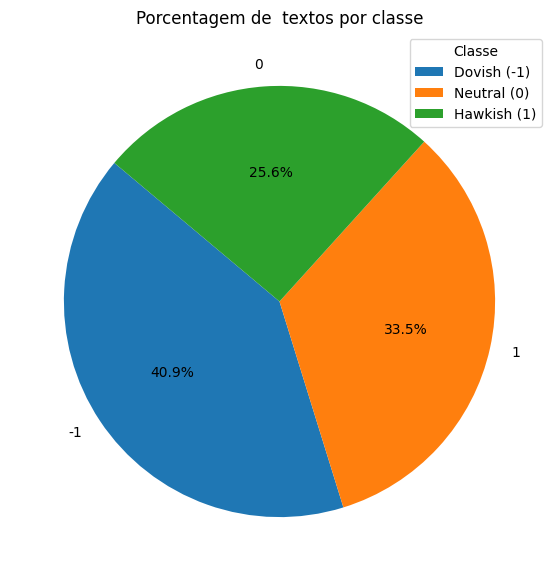

In [43]:
# Dados para o gráfico de pizza
classes = df_pt['decisao'].value_counts().index
porcentagens  # Porcentagens para cada categoria

# Criar o gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(porcentagens, labels=classes, autopct='%1.1f%%', startangle=140)

# Adicionar um título
plt.title('Porcentagem de atas por classe')
plt.legend(title='Classe', labels=['Dovish (-1)', 'Neutral (0)', 'Hawkish (1)'])
plt.savefig('proporcao-labels.png')

# Mostrar o gráfico
plt.show()

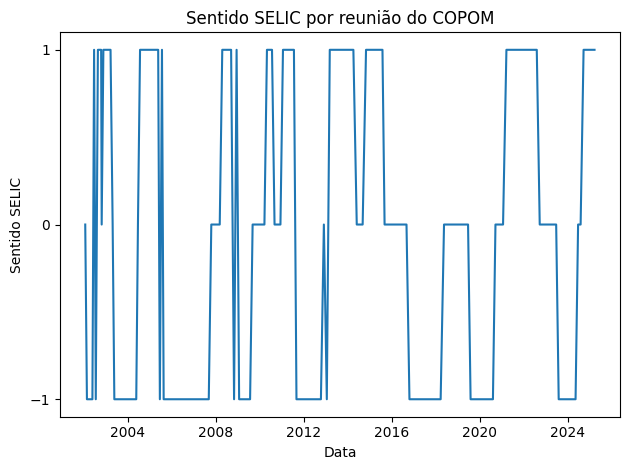

In [9]:
df_pt['data'] = pd.to_datetime(df_pt['data'], format='%Y%m%d')
plt.plot(df_pt['data'], df_pt['decisao'])
plt.xlabel('Data')
plt.ylabel('Sentido SELIC')
plt.yticks([-1, 0, 1])
plt.title('Sentido SELIC por reunião do COPOM')
plt.tight_layout()
plt.savefig('sentido-selic-reuniao.png')
plt.show()

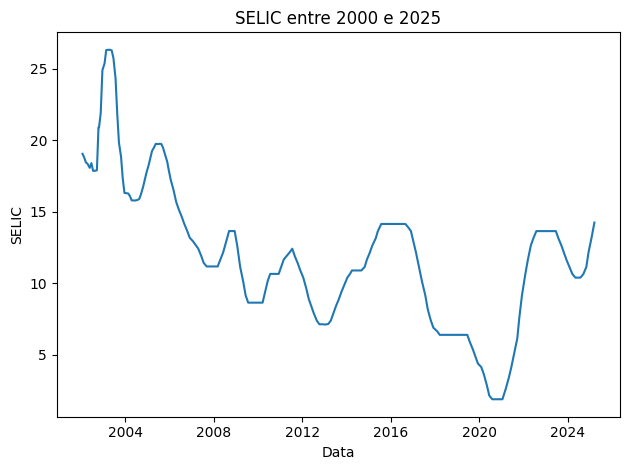

In [10]:
plt.plot(df_pt['data'], df_pt['selic'])
plt.xlabel('Data')
plt.ylabel('SELIC')
plt.title('SELIC entre 2000 e 2025')
plt.savefig('selic.png')
plt.tight_layout()
plt.show()

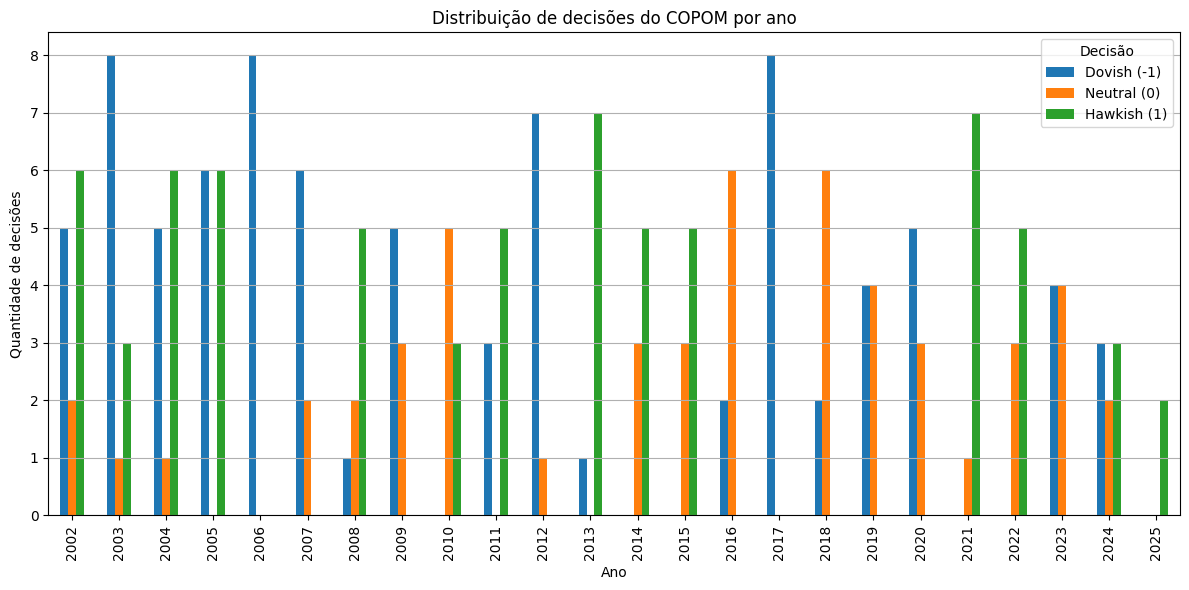

In [29]:
df_pt['ano'] = df_pt['data'].dt.year

decisoes_por_ano = df_pt.groupby('ano')['decisao'].value_counts().unstack(fill_value=0)

decisoes_por_ano = decisoes_por_ano[[-1, 0, 1]]

decisoes_por_ano.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição de decisões do COPOM por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de decisões')
plt.legend(title='Decisão', labels=['Dovish (-1)', 'Neutral (0)', 'Hawkish (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('distribuicao-sentido-selic-ano.png')
plt.show()

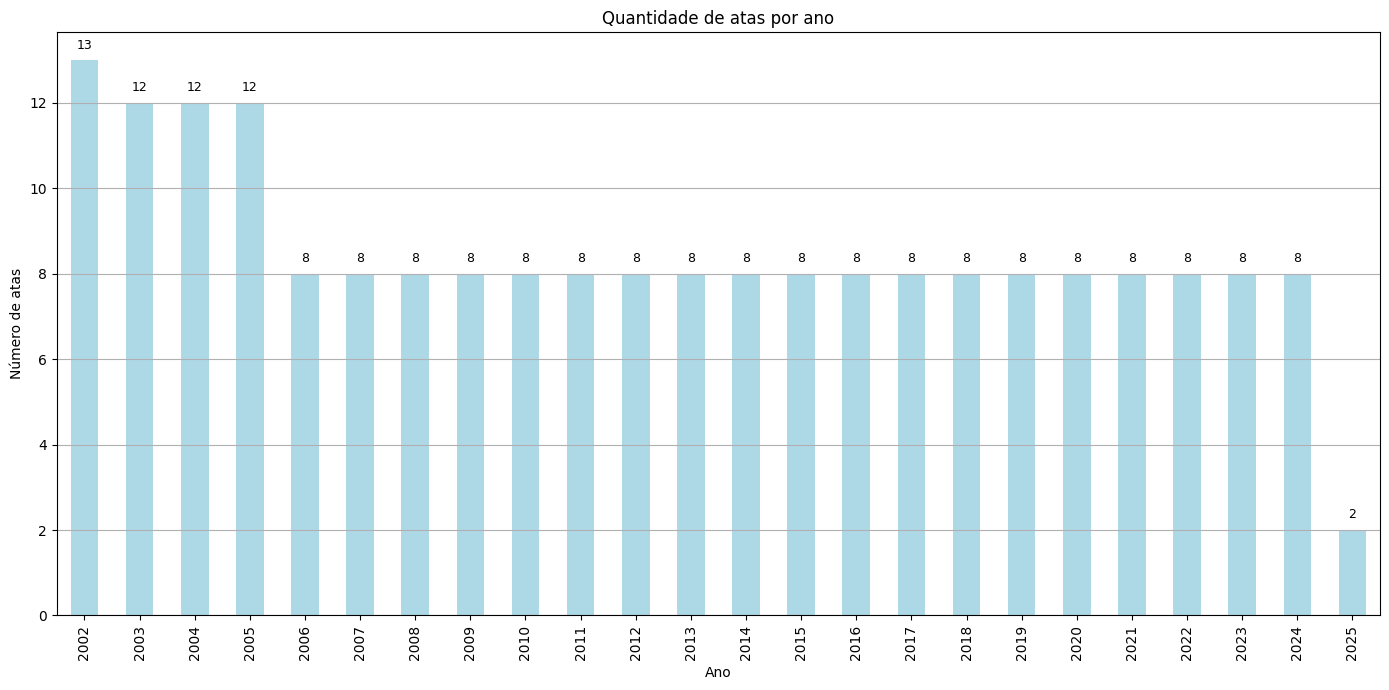

In [36]:
quantidade_atas_ano  = df_pt['ano'].value_counts().sort_index()
plt.figure(figsize=(14, 7))
ax = quantidade_atas_ano.plot(kind='bar', color='lightblue')

for i, value in enumerate(quantidade_atas_ano):
    plt.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Quantidade de atas por ano')
plt.xlabel('Ano')
plt.ylabel('Número de atas')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('atas-ano.png')
plt.show()

In [12]:
def contar_tokens(frase):
    tokens = word_tokenize(frase)
    return len(tokens)

#tokens atas em portugues
df_pt['tokens'] = df_pt['texto_ata'].apply(contar_tokens)

#tokens atas em ingles
df_en['tokens'] = df_en['texto_ata'].apply(contar_tokens)

In [13]:
media_tokens_pt = df_pt['tokens'].mean()
media_tokens_pt = int(media_tokens_pt)
print(f'A média de tokens no dataset é de {media_tokens_pt} tokens por texto em portugues')

media_tokens_en = df_en['tokens'].mean()
media_tokens_en = int(media_tokens_en)
print(f'A média de tokens no dataset é de {media_tokens_en} tokens por texto em ingles')

A média de tokens no dataset é de 6566 tokens por texto em portugues
A média de tokens no dataset é de 6005 tokens por texto em ingles


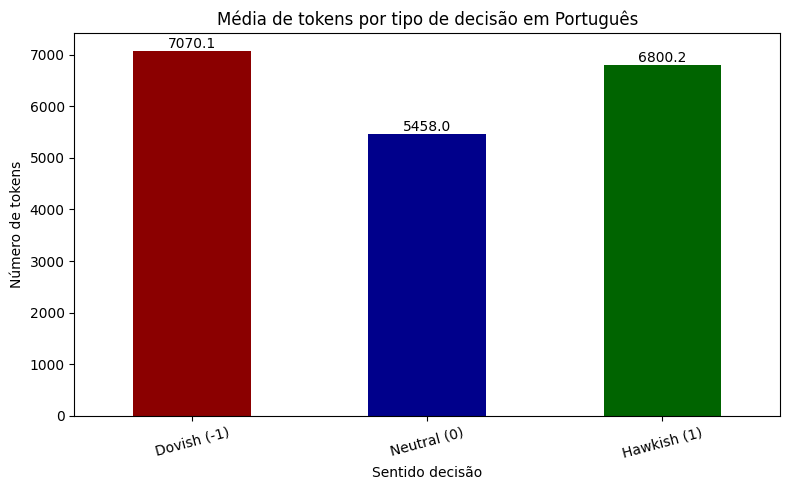

In [14]:
media_tokens_df_pt = df_pt.groupby('decisao')['tokens'].mean()

# Plotar gráfico de barras
media_tokens_df_pt.plot(kind='bar', color=['darkred', 'darkblue', 'darkgreen'], figsize=(8, 5))
for i, value in enumerate(media_tokens_df_pt):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Média de tokens por tipo de decisão em Português')
plt.xlabel('Sentido decisão')
plt.ylabel('Número de tokens')
plt.xticks(ticks=[0, 1, 2], labels=['Dovish (-1)', 'Neutral (0)', 'Hawkish (1)'], rotation=15)
plt.tight_layout()
plt.savefig('media_tokens_sentido_selic_pt.png')
plt.show()

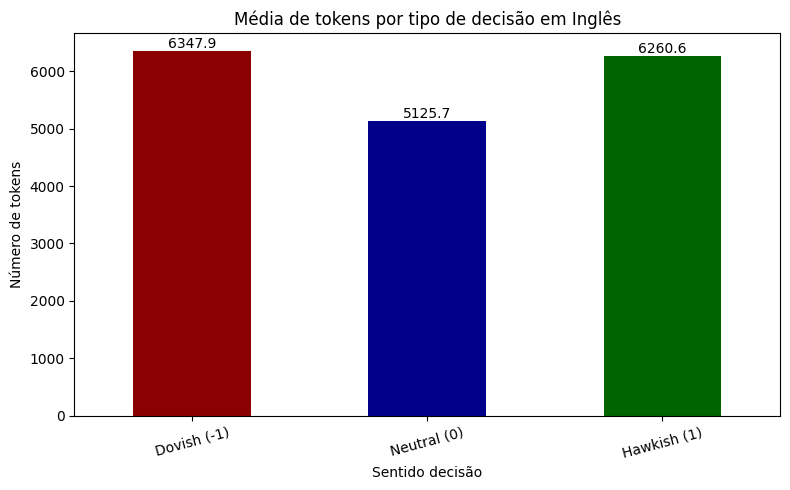

In [15]:
media_tokens_df_en = df_en.groupby('decisao')['tokens'].mean()

# Plotar gráfico de barras
media_tokens_df_en.plot(kind='bar', color=['darkred', 'darkblue', 'darkgreen'], figsize=(8, 5))
for i, value in enumerate(media_tokens_df_en):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Média de tokens por tipo de decisão em Inglês')
plt.xlabel('Sentido decisão')
plt.ylabel('Número de tokens')
plt.xticks(ticks=[0, 1, 2], labels=['Dovish (-1)', 'Neutral (0)', 'Hawkish (1)'], rotation=15)
plt.tight_layout()
plt.savefig('media_tokens_sentido_selic_en.png')
plt.show()

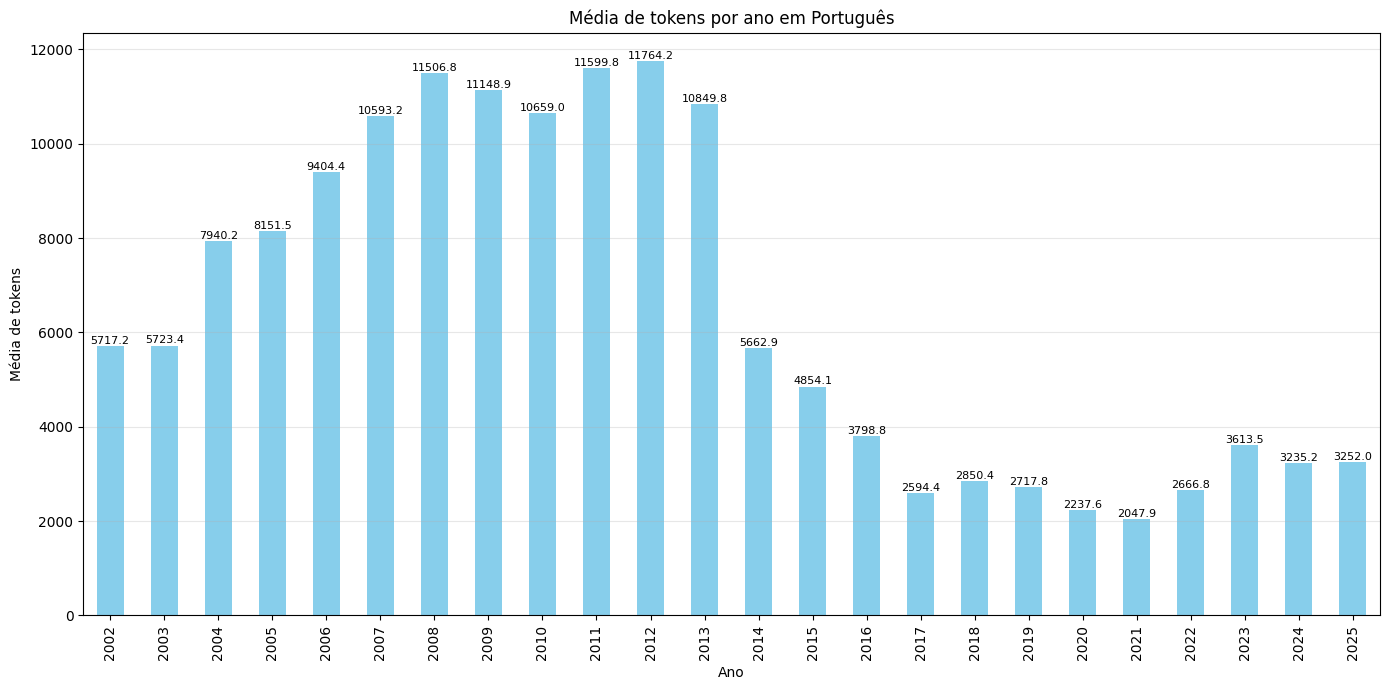

In [16]:
#Media de tokens por ano em portugues
media_tokens_ano_pt = df_pt.groupby('ano')['tokens'].mean()
ax = media_tokens_ano_pt.plot(kind='bar', figsize=(14, 7), color='skyblue')

for i, value in enumerate(media_tokens_ano_pt):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

plt.title('Média de tokens por ano em Português')
plt.xlabel('Ano')
plt.ylabel('Média de tokens')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('media_tokens_ano_pt.png')
plt.show()

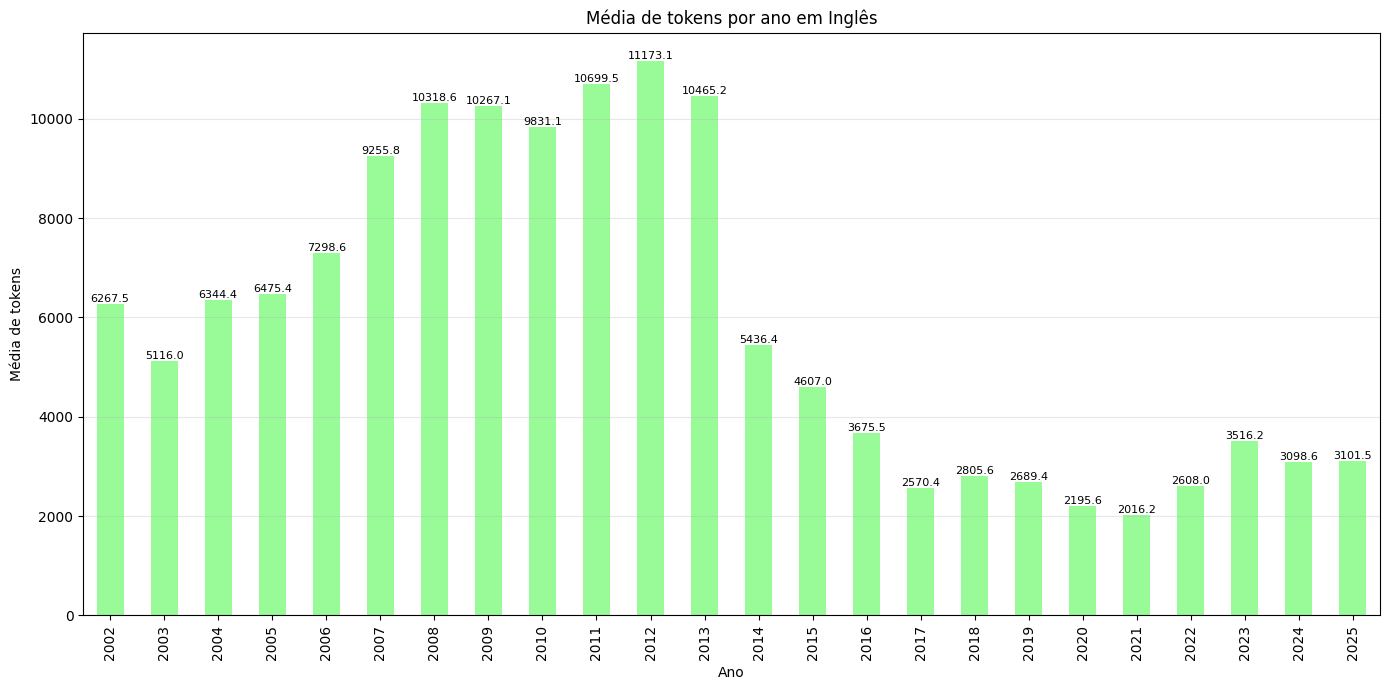

In [17]:
#Media de tokens por ano em ingles

#arruma a data para ingles
df_en['data'] = pd.to_datetime(df_en['data'], format='%Y%m%d')
df_en['ano'] = df_en['data'].dt.year

media_tokens_ano_en = df_en.groupby('ano')['tokens'].mean()
ax = media_tokens_ano_en.plot(kind='bar', figsize=(14, 7), color='palegreen')

for i, value in enumerate(media_tokens_ano_en):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=8)

plt.title('Média de tokens por ano em Inglês')
plt.xlabel('Ano')
plt.ylabel('Média de tokens')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig('media_tokens_ano_en.png')
plt.show()

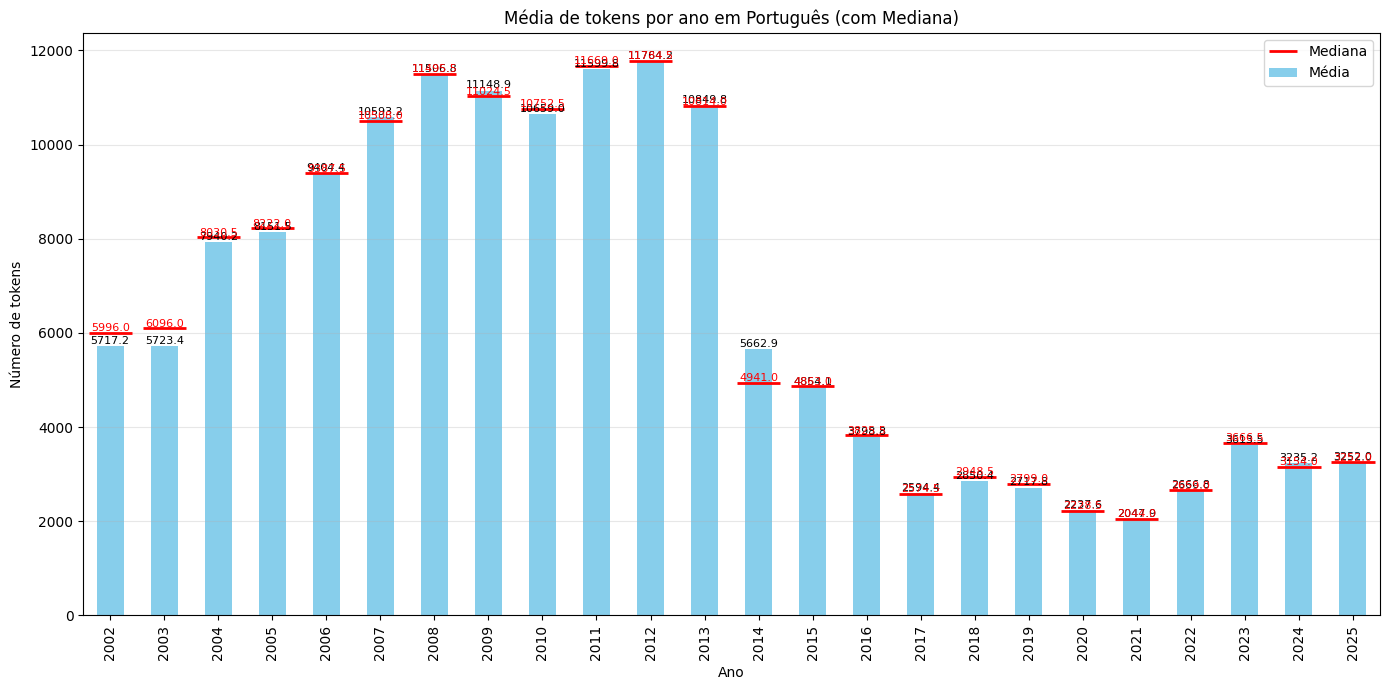

In [18]:
# Calcula média e mediana por ano
agrupado = df_pt.groupby('ano')['tokens']
media_tokens_ano = agrupado.mean()
mediana_tokens_ano = agrupado.median()

# Gráfico de barras (média)
ax = media_tokens_ano.plot(kind='bar', figsize=(14, 7), color='skyblue', label='Média')

# Adiciona a mediana como linha ou marcador sobre as barras
for i, (media, mediana) in enumerate(zip(media_tokens_ano, mediana_tokens_ano)):
    # Linha fina para marcar a mediana sobre a barra
    ax.hlines(mediana, i - 0.4, i + 0.4, colors='red', linewidth=2, label='Mediana' if i == 0 else "")
    # Texto com valor da média
    plt.text(i, media + 1, f'{media:.1f}', ha='center', va='bottom', fontsize=8, color='black')
    # Texto com valor da mediana
    plt.text(i, mediana - 5, f'{mediana:.1f}', ha='center', va='bottom', fontsize=8, color='red')

# Ajustes visuais
plt.title('Média de tokens por ano em Português (com Mediana)')
plt.xlabel('Ano')
plt.ylabel('Número de tokens')
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
#plt.savefig('media_com_mediana_tokens_ano_pt.png')
plt.show()

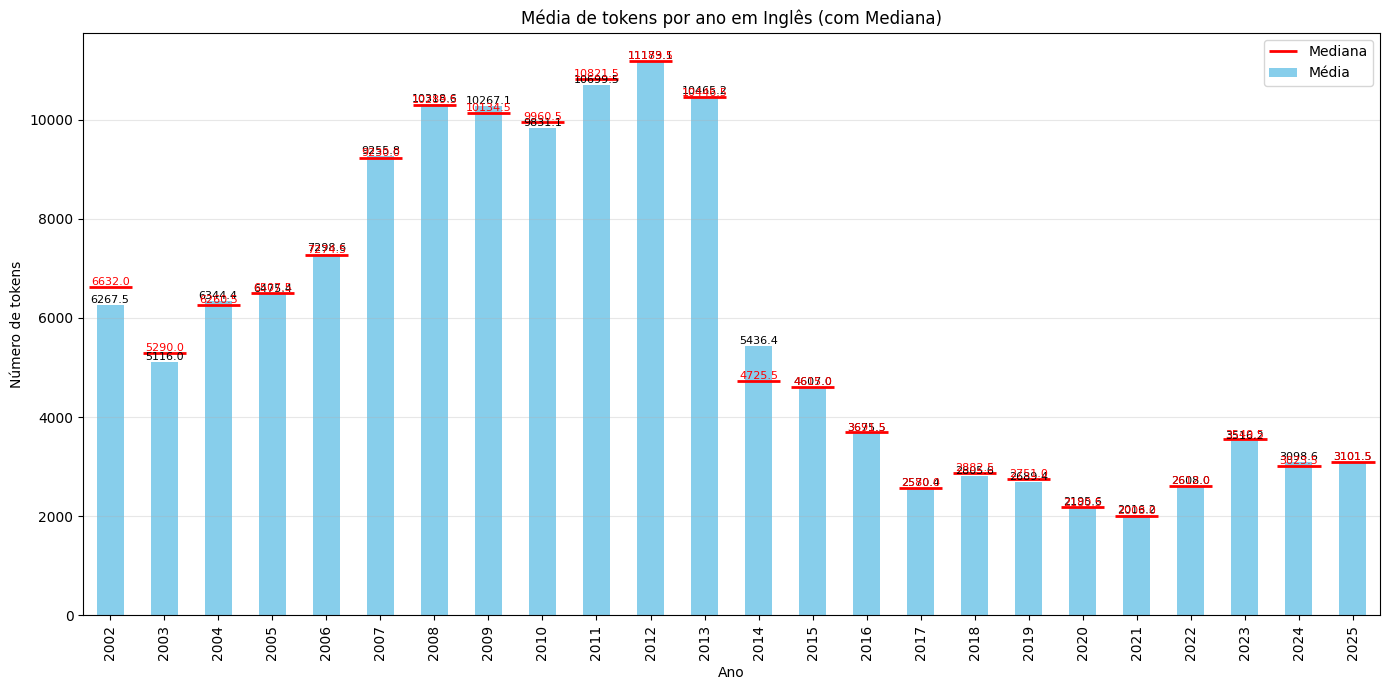

In [19]:
# Calcula média e mediana por ano
agrupado_en = df_en.groupby('ano')['tokens']
media_tokens_ano_en = agrupado_en.mean()
mediana_tokens_ano_en = agrupado_en.median()

# Gráfico de barras (média)
ax = media_tokens_ano_en.plot(kind='bar', figsize=(14, 7), color='skyblue', label='Média')

# Adiciona a mediana como linha ou marcador sobre as barras
for i, (media, mediana) in enumerate(zip(media_tokens_ano_en, mediana_tokens_ano_en)):
    # Linha fina para marcar a mediana sobre a barra
    ax.hlines(mediana, i - 0.4, i + 0.4, colors='red', linewidth=2, label='Mediana' if i == 0 else "")
    # Texto com valor da média
    plt.text(i, media + 1, f'{media:.1f}', ha='center', va='bottom', fontsize=8, color='black')
    # Texto com valor da mediana
    plt.text(i, mediana - 5, f'{mediana:.1f}', ha='center', va='bottom', fontsize=8, color='red')

# Ajustes visuais
plt.title('Média de tokens por ano em Inglês (com Mediana)')
plt.xlabel('Ano')
plt.ylabel('Número de tokens')
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
#plt.savefig('media_com_mediana_tokens_ano_en.png')
plt.show()

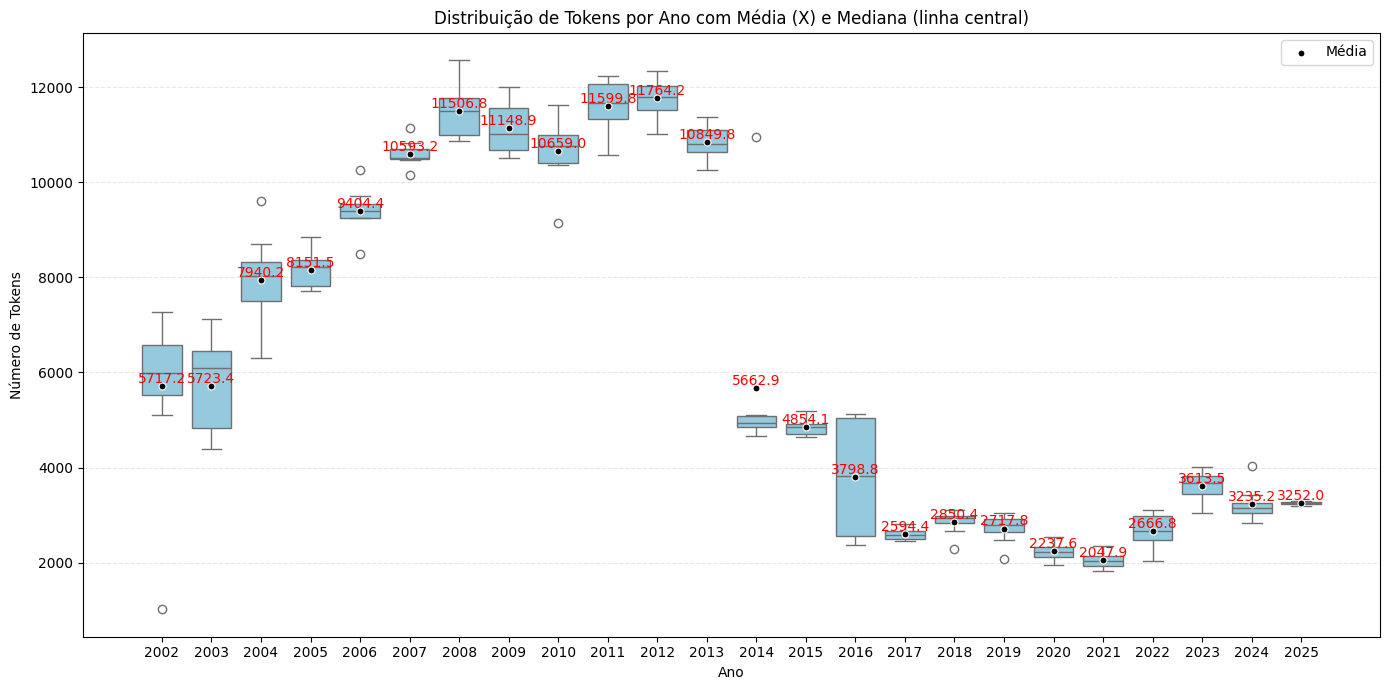

In [20]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='ano', y='tokens', data=df_pt, color='skyblue', showfliers=True)

# Calcula a média por ano para sobrepor
media_tokens = df_pt.groupby('ano')['tokens'].mean()

# Adiciona a média como pontos sobre o boxplot
sns.scatterplot(x=media_tokens.index.astype(str), y=media_tokens.values, 
                color='black', label='Média', zorder=10, s=100, marker='.')

# Anotando os valores da média sobre os pontos
for i, valor in enumerate(media_tokens):
    plt.text(i, valor + 1, f'{valor:.1f}', ha='center', va='bottom', fontsize=10, color='red')

# Configurações visuais
plt.title('Distribuição de Tokens por Ano com Média (X) e Mediana (linha central)')
plt.xlabel('Ano')
plt.ylabel('Número de Tokens')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
#plt.savefig('boxplot_tokens_ano_pt_com_outliers.png')
plt.show()